Instructions for how to fix the initial conditions files (temperature and salinity) for the child model.

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from salishsea_tools.nc_tools import scDataset


%matplotlib inline

In [2]:
child = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
parent_orig = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc')['Bathymetry'][:]
parent_fix = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
elevation = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/IBCAO_V3_500m_RR_For_Nesting_Tools.nc')['Bathymetry'][:]

## At timestep = 1, the model becomes unstable due to high velocities.

    ==>> time-step=            1  abs(U) max:   1.400076883992015E+065

    ===>>> : E R R O R
     ===========

    stpctl: the zonal velocity is larger than 20 m/s
    ======
    kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49

       output of last fields in numwso
    ==>> time-step=            1  SSS min:   22.1943175862609

    ===>>> : E R R O R
     ===========

    step: indic < 0

    dia_wri_state : single instantaneous ocean state
    ~~~~~~~~~~~~~   and forcing fields file created
             and named :1_output.abort                  .nc

## Parent bathymetry we start with: real_bathy_for_agrif

(10, 100)

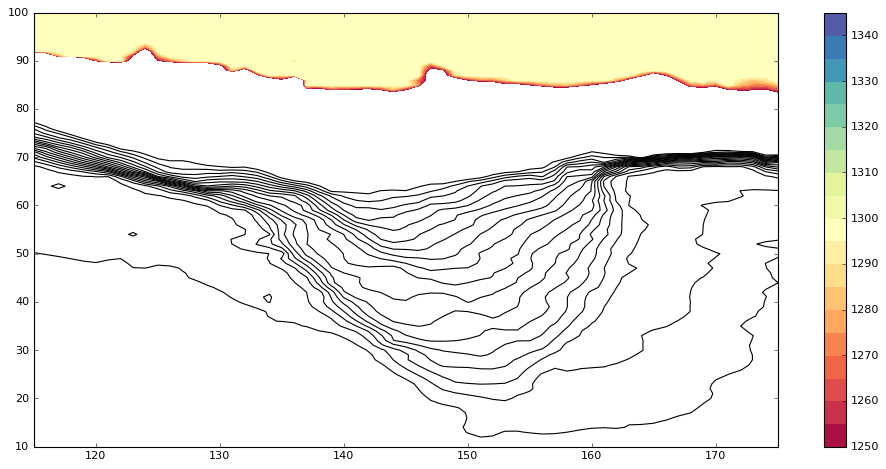

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_orig, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_orig, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

## Parent bathymetry after land is fixed: real_bathy_for_agrif_fix

(10, 100)

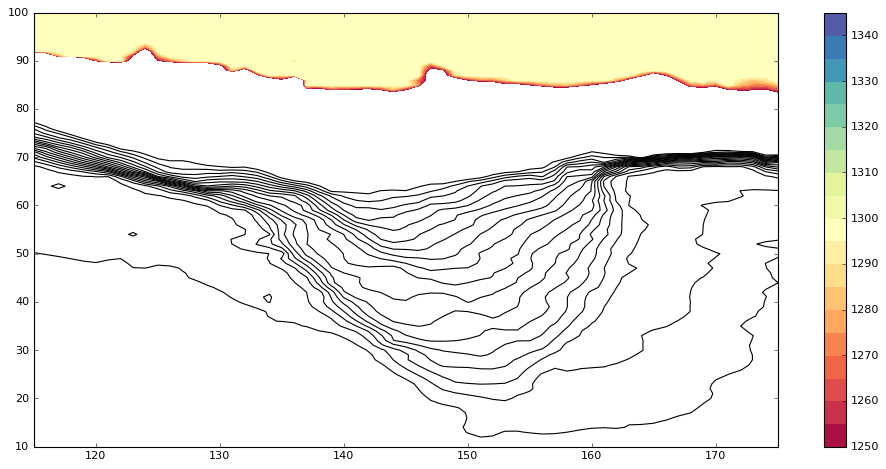

In [5]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_fix, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_fix, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

## Elevation database used as reference for interpolating bathymetry in the child: IBCAO_V3_500m_RR_For_Nesting_Tools

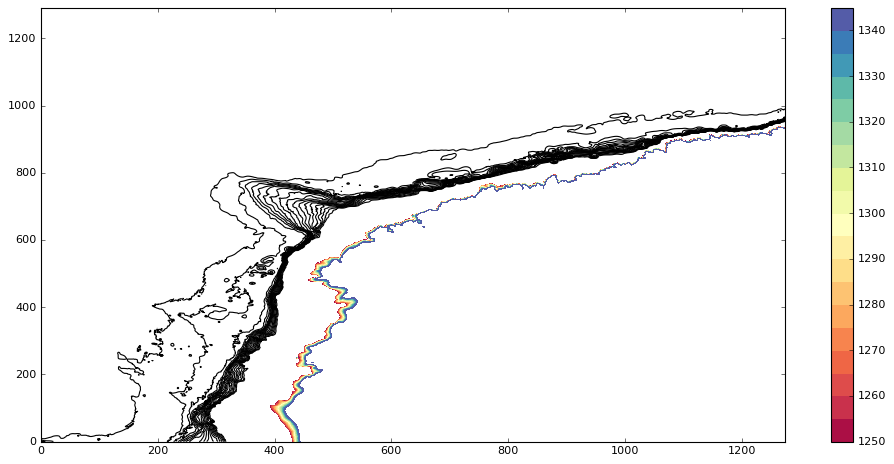

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(elevation, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(elevation, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)

## Child bathymetry that uses the fixed parent and elevation database: 1_real_bathy_for_agrif_fix

(0, 274)

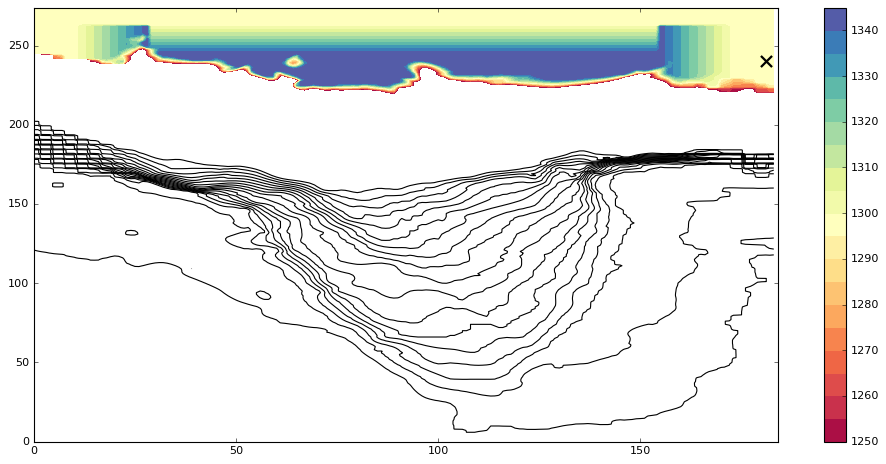

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(child, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(child, levels = np.arange(40, 400, 20), colors='k')
ax.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
fig.colorbar(p, ax=ax)
ax.set_xlim([0, child.shape[-1]])
ax.set_ylim([0, child.shape[-2]])

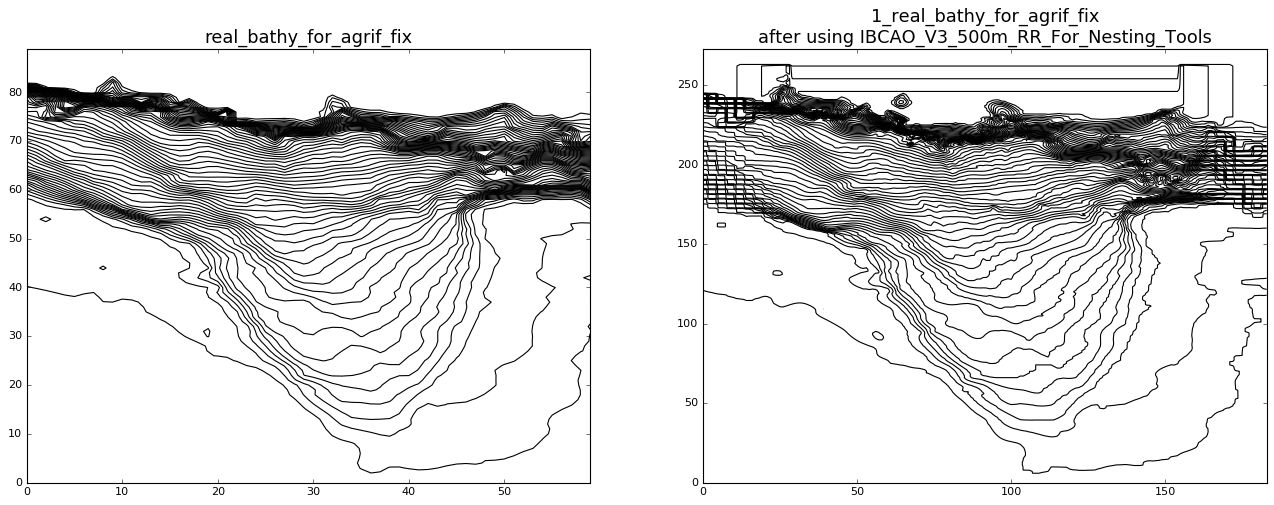

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 7))
levels = np.arange(40, 1350, 20)
ax1.contour(parent_fix[10:100, 115:175], levels=levels, colors='k')
ax2.contour(child, levels=levels, colors='k')
ax1.set_title('real_bathy_for_agrif_fix', fontsize=16)
ax2.set_title('1_real_bathy_for_agrif_fix\nafter using IBCAO_V3_500m_RR_For_Nesting_Tools', fontsize=16)

## 1. To cross out the possibility that the refined bathymetry of the child (1_real_bathy_for_agrif_fix) is causing the model to be unstable, we interpolate the child from now on using only the parent bathymetry (and not using IBCAO_V3_500m_RR_For_Nesting_Tools.nc).

We still get the same error, just at a deeper z level.

    <                 8  ocean grid points suppressed
    ---
    >                 7  ocean grid points suppressed
    1530c1530
    <   ==>> time-step=            1  abs(U) max:   1.400076883992016E+065
    ---
    >   ==>> time-step=            1  abs(U) max:   1.400076883992015E+065
    1537c1537
    <  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   43
    ---
    >  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49

## 2. Another possibility was the initial conditions (temperature and salinity) given to the child model. 

In [9]:
temp = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_temperature_for_agrif.nc')['votemper'][:]
salt = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_salinity_for_agrif.nc')['vosaline'][:]

In [10]:
temp.shape

(1, 80, 274, 184)

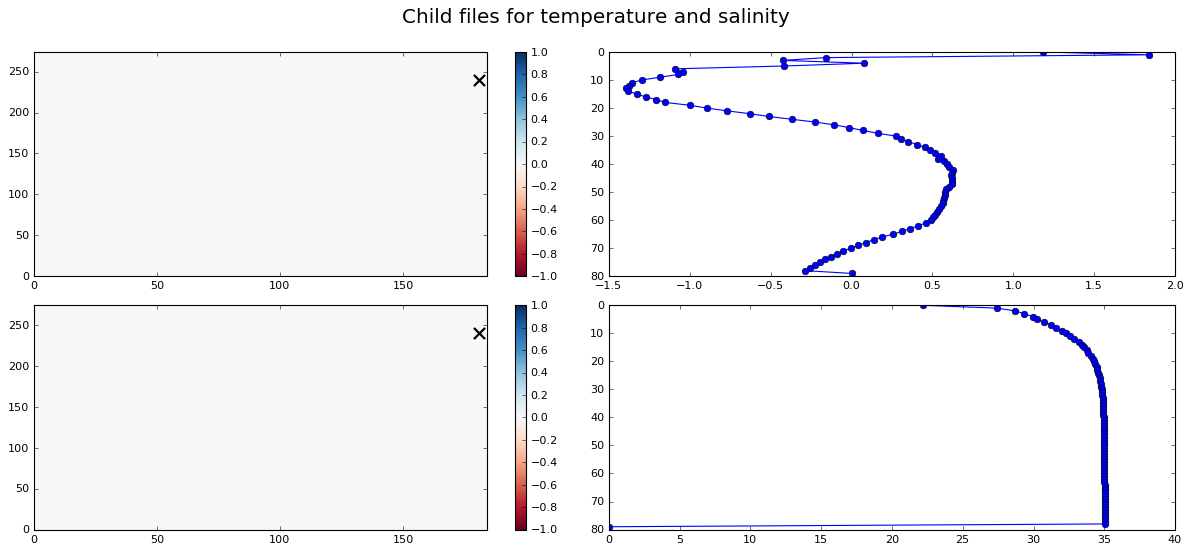

In [11]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp, salt], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
fig.tight_layout()
plt.subplots_adjust(top=0.9)

In [12]:
temp0 = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/temperature/temperature_for_agrif.nc')['votemper'][:]
salt0 = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]

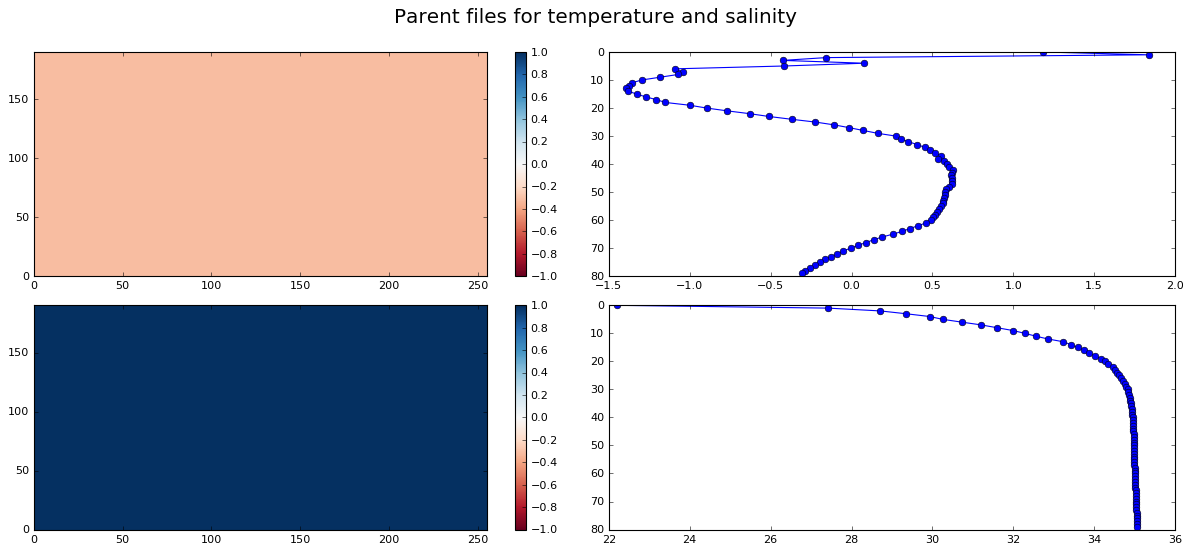

In [13]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Parent files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp0, salt0], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    fig.colorbar(p, ax=axa)
    axb.plot(var[0, :, 100, 175], np.arange(80), marker='o')
    axb.invert_yaxis()
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
fig.tight_layout()
plt.subplots_adjust(top=0.9)

#### The parent files looks good, but the child files have zeros at the bottom.

## 3. The child files for temperature and salinity were fixed by making the bottom values equal to the values at the depth level just above it.

This notebook does not need to be used. But, since the script doesn't work in Orcinus, we have to do this:

1. Produce 1_temperature_for_agrif.nc and 1_salinity_for_agrif.nc using run.sh in orcinus.
2. scp both files into halibut, for example into /runs_mackenzie_canyon/runs/real_base
3. python fix_initial_conditions
4. scp both files (now fixed) back into the orcinus.

## 4. But, the model is still unstable.

    ==>> time-step=            1  abs(U) max:   1.400076883992013E+065

     ===>>> : E R R O R
             ===========

      stpctl: the zonal velocity is larger than 20 m/s
      ====== 
     kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   52

               output of last fields in numwso
      ==>> time-step=            1  SSS min:   22.1943175862609     

     ===>>> : E R R O R
             ===========

     step: indic < 0

     dia_wri_state : single instantaneous ocean state
     ~~~~~~~~~~~~~   and forcing fields file created 
                     and named :1_output.abort                  .nc
                     
                     
### 1_namelist_cfg

    >    jpidta      =     184                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
    >    jpjdta      =     274                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2 
    
### mackenzie_real
    nb_connection_pts = 6
    
## 5. Checking the initial conditions files again, but they are correct (no zeros at the bottom).

In [7]:
temp = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_NEMO_files/1_temperature_for_agrif.nc')['votemper'][:]
salt = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_NEMO_files/1_salinity_for_agrif.nc')['vosaline'][:]

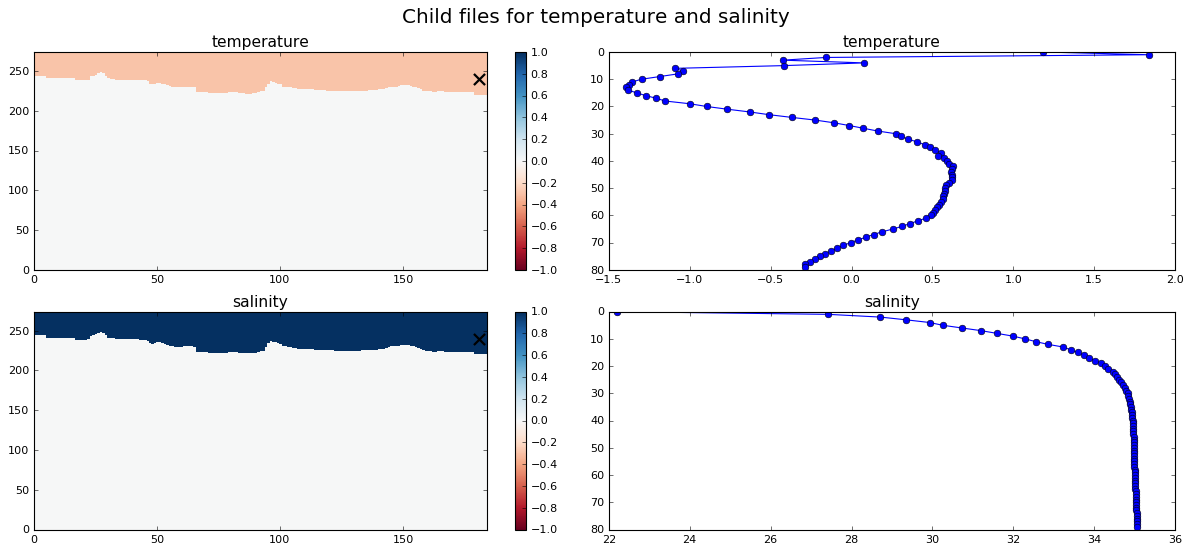

In [12]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n, title in zip([temp, salt], [ax1, ax3], [ax2, ax4], np.arange(2), ['temperature', 'salinity']):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
    axa.set_title(title, fontsize=14)
    axb.set_title(title, fontsize=14)
fig.tight_layout()
plt.subplots_adjust(top=0.9)

## 6. Checking bathymetry of the child. On the western and eastern boundaries, the bathymetry contours on the slope look very "step-y", but this does not overlap with the x,y where the model crashes. 

In [4]:
child = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_bathy_meter.nc')['Bathymetry'][:]

(0, 274)

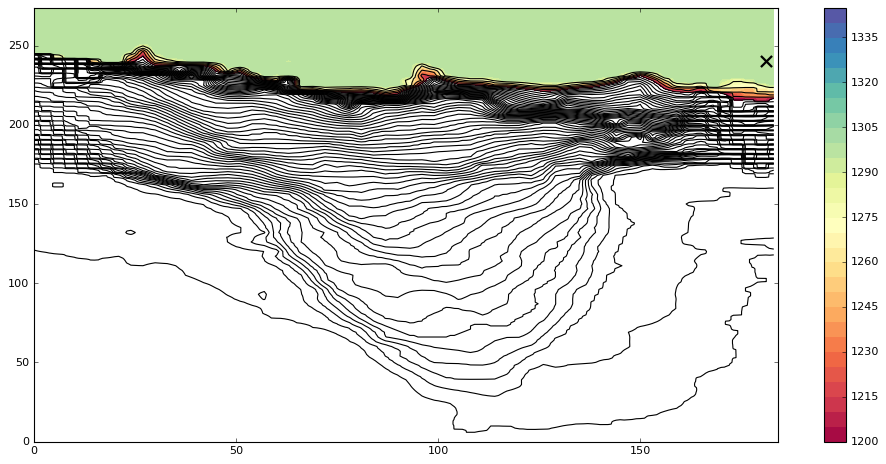

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(child, cmap=cm.Spectral, levels = np.arange(1200, 1350, 5))
c = ax.contour(child, levels = np.arange(40, 1300, 20), colors='k')
ax.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
fig.colorbar(p, ax=ax)
ax.set_xlim([0, child.shape[-1]])
ax.set_ylim([0, child.shape[-2]])


In [18]:
mmp = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/mesh_mask.nc')['umask']
mmc = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_mesh_mask.nc')['umask']

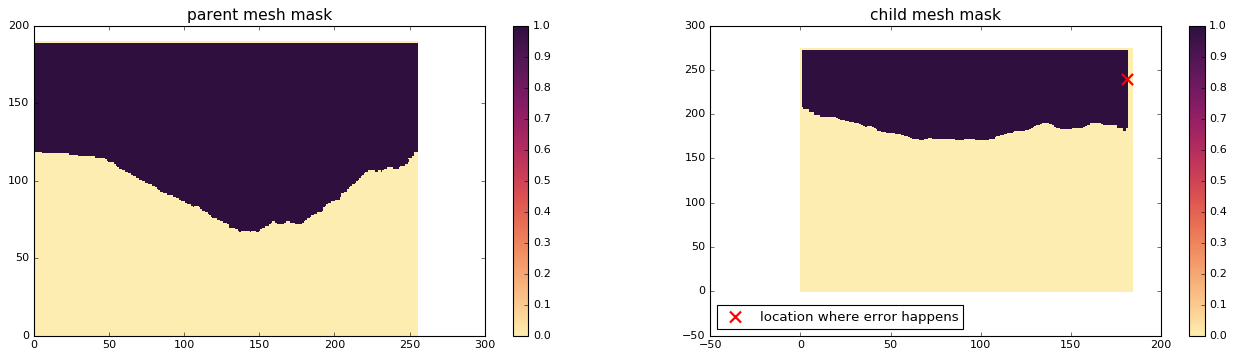

In [32]:
dep_ind = 51
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
p = ax1.pcolormesh(mmp[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax1); ax1.set_title('parent mesh mask', fontsize=14)
p = ax2.pcolormesh(mmc[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax2); ax2.set_title('child mesh mask', fontsize=14)
ax2.scatter(181, 240, s=100, c='r', marker='x', linewidth=2, label='location where error happens')
ax2.legend(loc=3, scatterpoints=1)

## 7. Looking at the results in the abort output file. There's only 1 time step available. The u-velocity plot shows fingers coming in from the east boundary.

In [23]:
abort = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_output.abort.nc')

In [24]:
abort_u = abort['vozocrtx'][0, ...]
abort_t = abort['votemper'][0, ...]
abort_s = abort['vosaline'][0, ...]

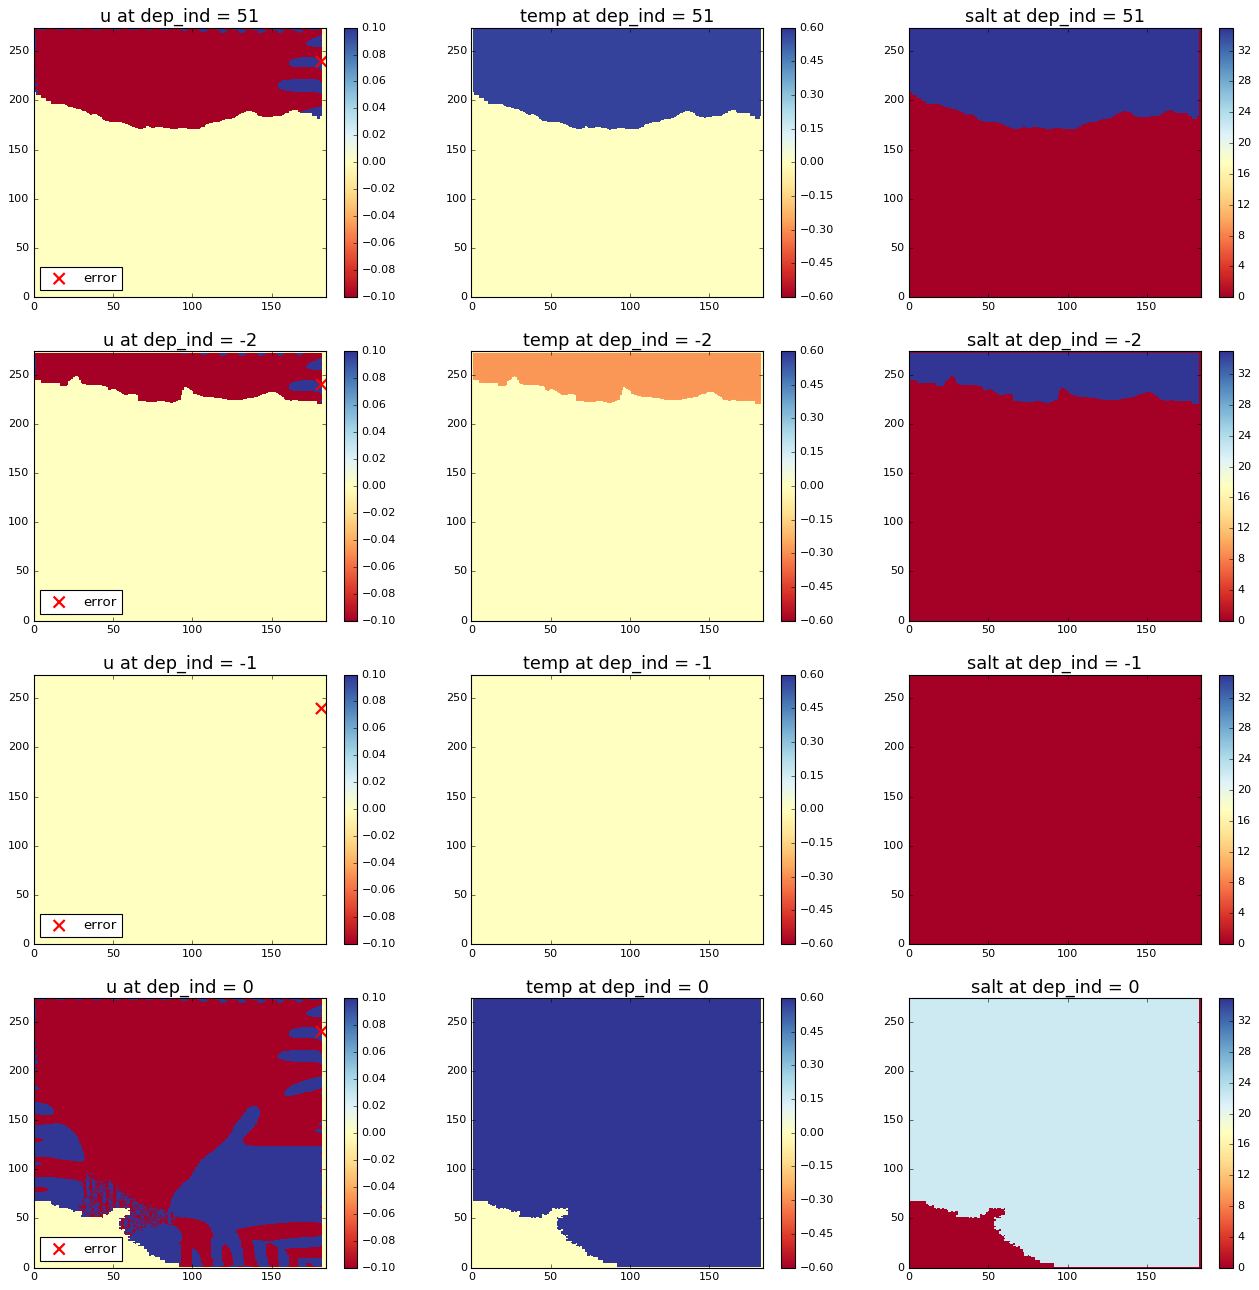

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(20, 20))
for ax, dep_ind, i in zip([ax1, ax2, ax3, ax4], [51, -2, -1, 0], np.arange(4)):
    for var, title, n in zip([abort_u, abort_t, abort_s], ['u', 'temp', 'salt'], np.arange(3)):
        if title == 'u':
            vmin, vmax = -0.1, 0.1
        if title == 'temp':
            vmin, vmax = -0.6, 0.6
        if title == 'salt':
            vmin, vmax = 0, 35
        var_plot = var[dep_ind, ...]
        p = ax[n].pcolormesh(var_plot, cmap=cm.RdYlBu, vmin=vmin, vmax=vmax)
        fig.colorbar(p, ax=ax[n])
        ax[n].set_title(title + ' at dep_ind = '+ str(dep_ind), fontsize=16)
        ax[n].set_xlim([0, var_plot.shape[-1]]); ax[n].set_ylim([0, var_plot.shape[-2]])
    ax[0].scatter(181, 240, s=100, c='r', marker='x', linewidth=2, label='error')
    ax[0].legend(loc=3, scatterpoints=1)

# 8. Trying zero winds (utau=0).

In [47]:
abort = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-19T133758.311194-0800/1_output.abort.nc')
abort_u = abort['vozocrtx'][0, ...]
abort_t = abort['votemper'][0, ...]
abort_s = abort['vosaline'][0, ...]

In [48]:
abort['sozotaux'][0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

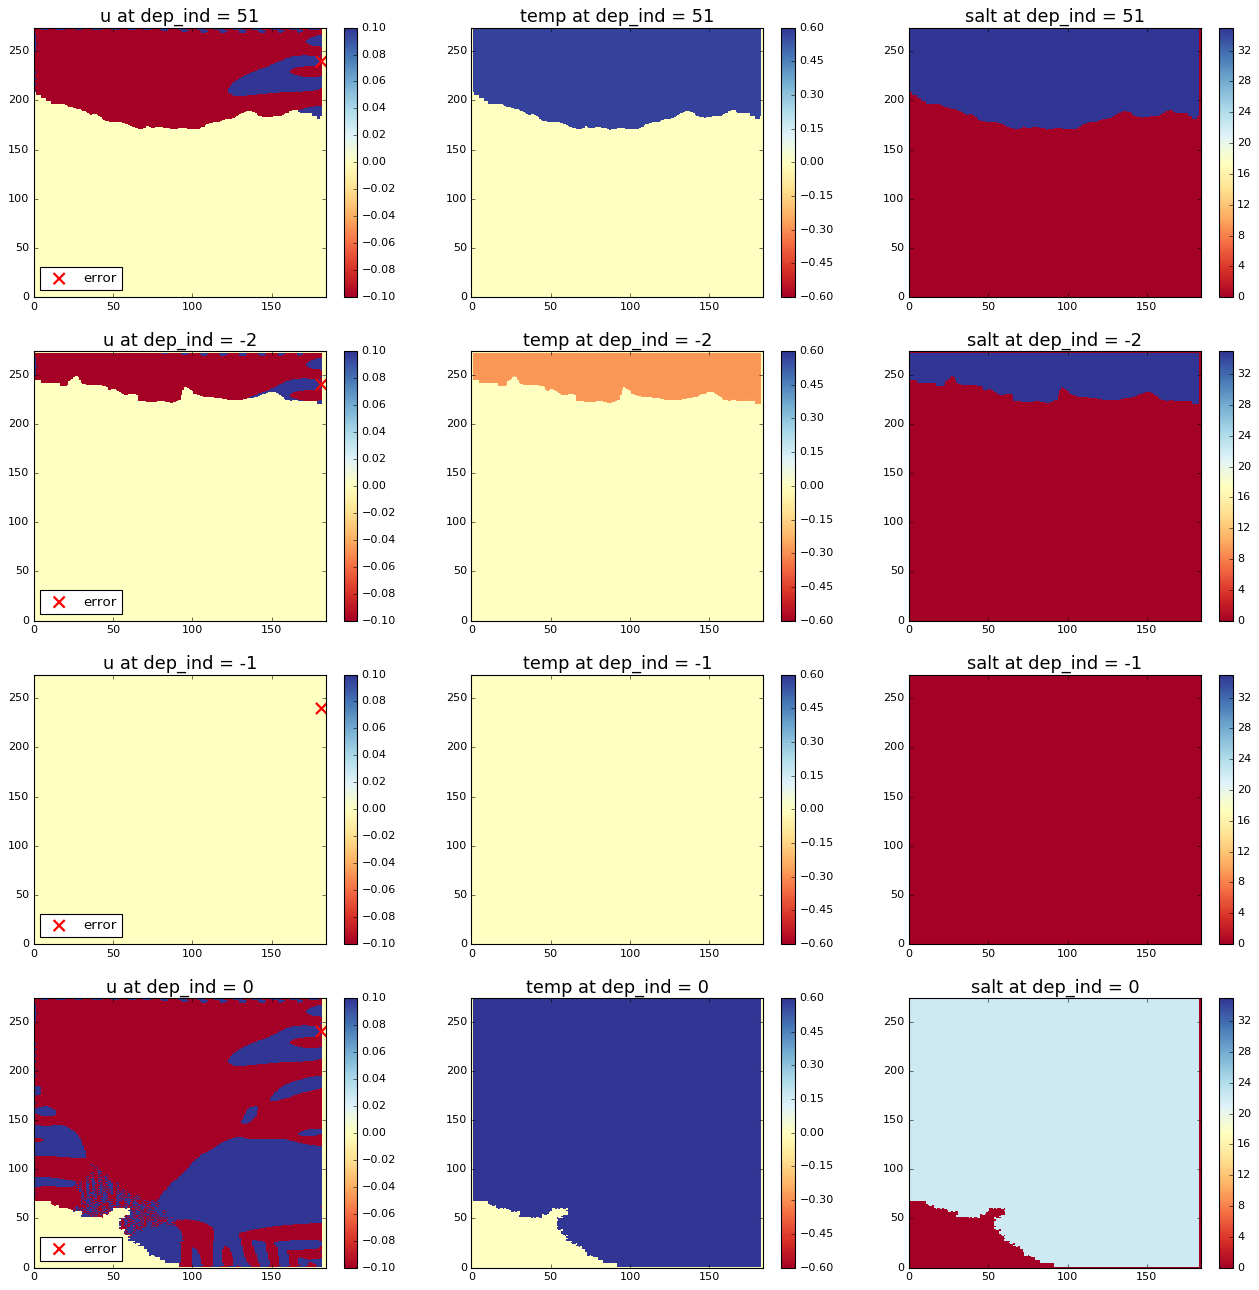

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(20, 20))
for ax, dep_ind, i in zip([ax1, ax2, ax3, ax4], [51, -2, -1, 0], np.arange(4)):
    for var, title, n in zip([abort_u, abort_t, abort_s], ['u', 'temp', 'salt'], np.arange(3)):
        if title == 'u':
            vmin, vmax = -0.1, 0.1
        if title == 'temp':
            vmin, vmax = -0.6, 0.6
        if title == 'salt':
            vmin, vmax = 0, 35
        var_plot = var[dep_ind, ...]
        p = ax[n].pcolormesh(var_plot, cmap=cm.RdYlBu, vmin=vmin, vmax=vmax)
        fig.colorbar(p, ax=ax[n])
        ax[n].set_title(title + ' at dep_ind = '+ str(dep_ind), fontsize=16)
        ax[n].set_xlim([0, var_plot.shape[-1]]); ax[n].set_ylim([0, var_plot.shape[-2]])
    ax[0].scatter(181, 240, s=100, c='r', marker='x', linewidth=2, label='error')
    ax[0].legend(loc=3, scatterpoints=1)

## 9. Widening the "seam" by increasing nb_connection_pts to 9 (from 6). Turning winds back on.

In [50]:
abort = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-19T141736.713016-0800/1_output.abort.nc')
abort_u = abort['vozocrtx'][0, ...]
abort_t = abort['votemper'][0, ...]
abort_s = abort['vosaline'][0, ...]

In [51]:
abort['sozotaux'][0]

array([[-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329],
       [-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329],
       [-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329],
       ..., 
       [-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329],
       [-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329],
       [-0.00025329, -0.00025329, -0.00025329, ..., -0.00025329,
        -0.00025329, -0.00025329]], dtype=float32)

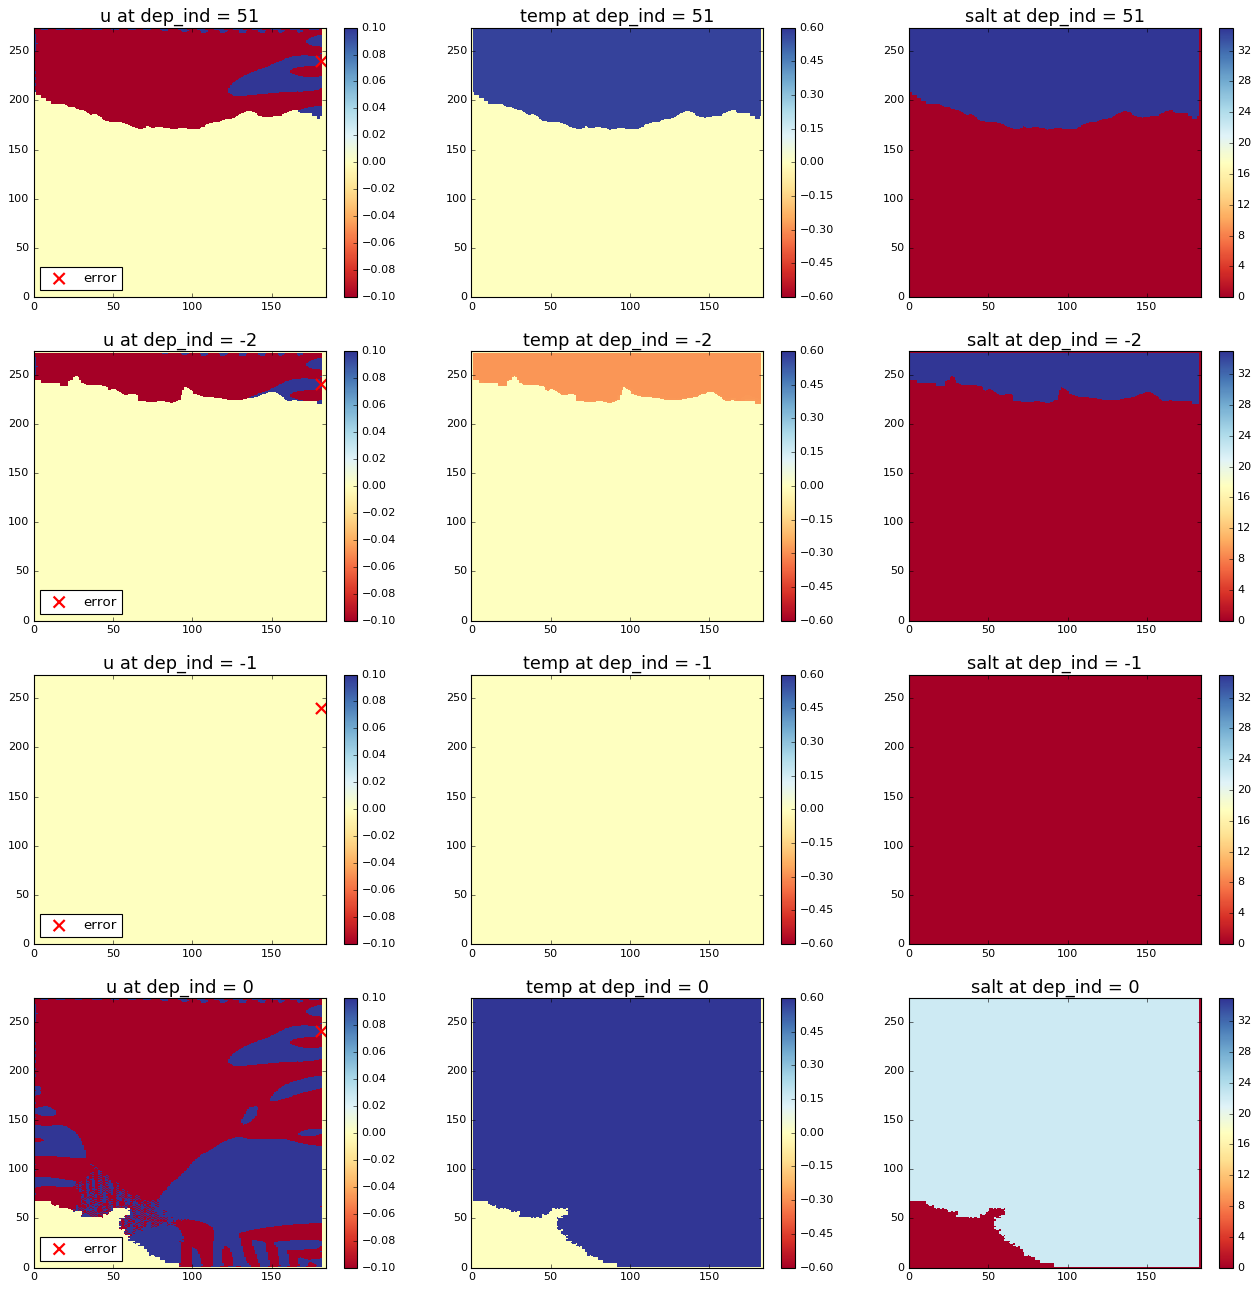

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(20, 20))
for ax, dep_ind, i in zip([ax1, ax2, ax3, ax4], [51, -2, -1, 0], np.arange(4)):
    for var, title, n in zip([abort_u, abort_t, abort_s], ['u', 'temp', 'salt'], np.arange(3)):
        if title == 'u':
            vmin, vmax = -0.1, 0.1
        if title == 'temp':
            vmin, vmax = -0.6, 0.6
        if title == 'salt':
            vmin, vmax = 0, 35
        var_plot = var[dep_ind, ...]
        p = ax[n].pcolormesh(var_plot, cmap=cm.RdYlBu, vmin=vmin, vmax=vmax)
        fig.colorbar(p, ax=ax[n])
        ax[n].set_title(title + ' at dep_ind = '+ str(dep_ind), fontsize=16)
        ax[n].set_xlim([0, var_plot.shape[-1]]); ax[n].set_ylim([0, var_plot.shape[-2]])
    ax[0].scatter(181, 240, s=100, c='r', marker='x', linewidth=2, label='error')
    ax[0].legend(loc=3, scatterpoints=1)

# Time step for new runs (real and ideal) after changing to dynspg_ts

|Key|Parent: rn_rdt & rn_rdtmin/max| Child: rn_rdt & rn_rdtmin/max|Parent: nn_itend & nn_stock| Child: nn_itend & nn_stock| rn_bt_cmax |barotropic ts [s] p&c|
|-|--------|----------|-----|-----|---|-----------|
|A|240 (4m)|80 (1m20s)|7200 |21600|0.5|
|B|180 (3m)|60 (1m)   |9600 |28800|0.5|
|C|240 (4m)|80 (1m20s)|7200 |21600|0.3|3.75 & 1.25|
|D|        |          |     |     |0.2|2.50 & 0.83|
|E|        |          |     |     |0.1|1.25 & 0.41|
|F|120 (2m)|40        |14400|43200|0.5|6.00 & 2.00|



|Key|ideal_base|ideal_half|ideal_double|real_base|real_half|real_double|
|-|---------|---------|----|---------|---------|----|
|A|11728    |**21600**|1026|959      |9539     |671 |
|B|**28800**|12847    |    |1962     |16799    |968 |
|C|         |         |    |959      |         |    |
|D|         |         |    |959      |         |    |
|E|         |         |    |959      |         |    |
|F|         |         |    |**43200**|**43200**|1717|


 grep -A 10 ln_ts_nn_auto real_base_01/1_ocean.output
 
* ideal parent
        jpidta      =     255                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
        jpjdta      =     190                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2
* ideal child        
        jpidta      =     244                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
        jpjdta      =     274                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2  
* real parent
        jpidta      =     255                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
        jpjdta      =     190                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2
* real child        
        jpidta      =     184                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
        jpjdta      =     274                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2

Differences between real/ideal
* namelist.cfg same
* 1_namelist.cfg diff dimensions 
* namelist.time same
* 1_namelist.time same

In [1]:
ts_p = 240 *0.5
ts_c = 80 *0.5

end_d = 20
end_s = end_d *24 *60 * 60
itend_p = end_s/ts_p
itend_c = end_s/ts_c


print('rn_rdt parent (and rn_rdtmin/max): ', ts_p)
print('rn_rdt child (and rn_rdtmin/max): ', ts_c)
print('nn_itend parent (and nn_stock): ', itend_p)
print('nn_itend child (and nn_stock): ', itend_c)

rn_rdt parent (and rn_rdtmin/max):  120.0
rn_rdt child (and rn_rdtmin/max):  40.0
nn_itend parent (and nn_stock):  14400.0
nn_itend child (and nn_stock):  43200.0
